<a href="https://colab.research.google.com/github/Lucas019/Credit-Card-Customer-Churn-Prediction/blob/main/Credit_Card_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

# **Load Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=50

In [2]:
data = pd.read_csv("/content/BankChurners.csv",index_col = 'CLIENTNUM')
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
CLIENTNUM,,,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


* **Attrition_Flag**: Whether the account is closed
---
**<u>Demographic Data</u>**
* **Customer_Age**: Customer's Age in Years
* **Gender**: M=Male, F=Female
* **Dependent_count**: Number of dependents
* **Education_Level**:  Educational Qualification of the account holder
* **Marital_Status**:  Married, Single, Divorced, Unknown
* **Income_Category**:  Annual Income Category of the account holder
---

* **Card_Category**: Product Variable-Type of Card (Blue, Silver, Gold, Platinum)
---
* **Months_on_book**: Period of relationship with bank
* **Total_Relationship_Count**: Total no. of products held by the customer
* **Credit_Limit**: Credit Limit on the Credit Card
* **Total_Revolving_Bal**: Total Revolving Balance on the Credit Card
* **Total_Trans_Amt**: Total Transaction Amount (Last 12 months)
* **Avg_Utilization_Ratio**: Average Card Utilization Ratio
---
* **Months_Inactive_12_mon**: No. of months inactive in the last 12 months
* **Contacts_Count_12_mon**: No. of Contacts in the last 12 months

* **Avg_Open_To_Buy**: Open to Buy Credit Line (Average of last 12 months)

* **Total_Amt_Chng_Q4_Q1**: Change in Transaction Amount (Q4 over Q1)
* **Total_Ct_Chng_Q4_Q1**: Change in Transaction Count (Q4 over Q1)





In [3]:
data['Churned'] = data['Attrition_Flag'].apply(lambda x: int(x=='Attrited Customer'))

# **Exploratory Data Analysis**

## Demographic features

In [4]:
data.groupby('Gender')['Churned'].mean().sort_values()
# Female are easier to churn, 
# but we should be cautious about including this feature since it may cause gender bias in the model.

Gender
M    0.146152
F    0.173572
Name: Churned, dtype: float64

In [5]:
data.groupby('Education_Level')['Churned'].mean().sort_values()
# People with higher education like Doctor and Post-Graduate are easier to churn

Education_Level
High School      0.152012
College          0.152024
Graduate         0.155691
Uneducated       0.159381
Unknown          0.168532
Post-Graduate    0.178295
Doctorate        0.210643
Name: Churned, dtype: float64

In [6]:
data.groupby(['Marital_Status'])['Churned'].mean().sort_values()
# Married < Divorced < Single < Unknown

Marital_Status
Married     0.151269
Divorced    0.161765
Single      0.169414
Unknown     0.172230
Name: Churned, dtype: float64

In [7]:
data.groupby(['Income_Category'])['Churned'].mean().sort_values()
# Top and bottom income categories are easier to churn

Income_Category
$60K - $80K       0.134807
$40K - $60K       0.151397
$80K - $120K      0.157655
Unknown           0.168165
Less than $40K    0.171862
$120K +           0.173315
Name: Churned, dtype: float64

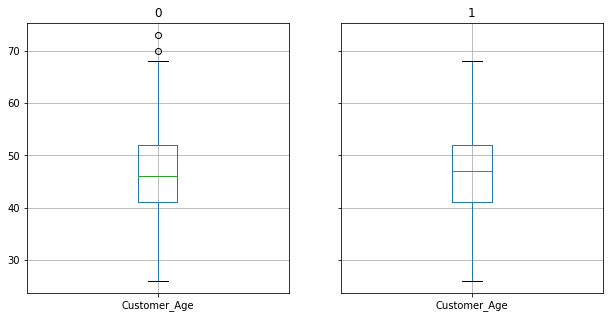

In [8]:
data.groupby(['Churned']).boxplot(column=['Customer_Age'], figsize=(10,5))
plt.show()
# Age does not play any difference in customer churn

## Product type

In [9]:
data.groupby('Card_Category')['Churned'].mean().sort_values()
# People with high-class card like Gold and Platinum are easier to churn

Card_Category
Silver      0.147748
Blue        0.160979
Gold        0.181034
Platinum    0.250000
Name: Churned, dtype: float64

## Customer Behaviors

Churned
0    35.880588
1    36.178242
Name: Months_on_book, dtype: float64


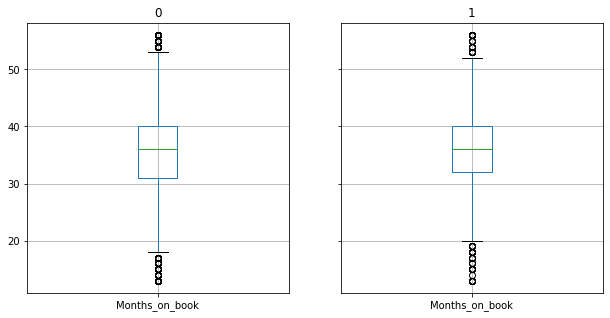

In [11]:
print(data.groupby(['Churned'])['Months_on_book'].mean())
data.groupby(['Churned']).boxplot(column=['Months_on_book'], figsize=(10,5))
plt.show()
# Surprisingly, new and old customer are equally likely to churn

Churned
0    3.914588
1    3.279656
Name: Total_Relationship_Count, dtype: float64


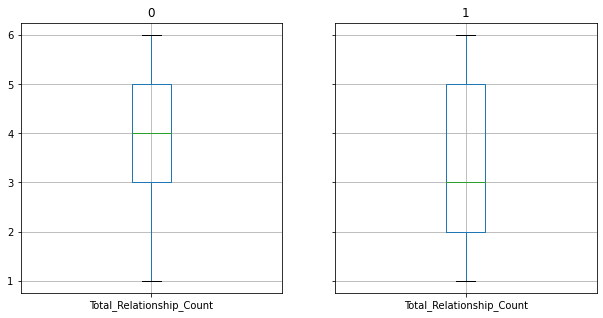

In [10]:
print(data.groupby(['Churned'])['Total_Relationship_Count'].mean())
data.groupby(['Churned']).boxplot(column=['Total_Relationship_Count'], figsize=(10,5))
plt.show()
# Churned customers have less contacts

Churned
0    8.621967
1    8.506475
Name: ln_Credit_Limit, dtype: float64


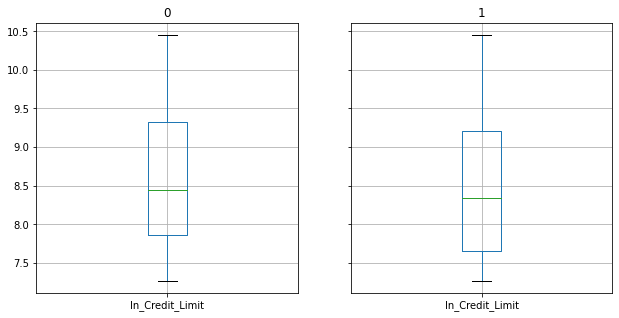

In [16]:
data['ln_Credit_Limit'] = data['Credit_Limit'].apply(np.log)
print(data.groupby(['Churned'])['ln_Credit_Limit'].mean())
data.groupby(['Churned']).boxplot(column=['ln_Credit_Limit'], figsize=(10,5))
plt.show()

Churned
0    5.929794
1    3.199864
Name: ln_Total_Revolving_Bal, dtype: float64


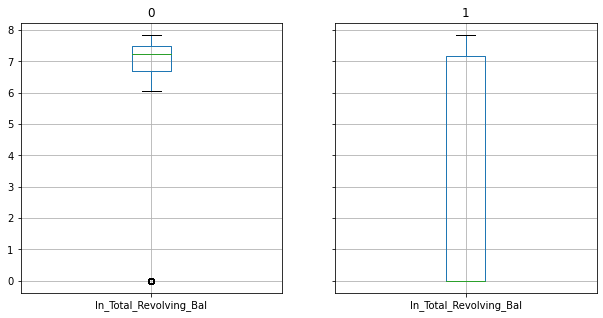

In [15]:
data['ln_Total_Revolving_Bal'] = data['Total_Revolving_Bal'].apply(lambda x: np.log(x+1))
print(data.groupby(['Churned'])['ln_Total_Revolving_Bal'].mean())
data.groupby(['Churned']).boxplot(column=['ln_Total_Revolving_Bal'], figsize=(10,5))
plt.show()

Churned
0    8.229806
1    7.825284
Name: ln_Total_Trans_Amt, dtype: float64


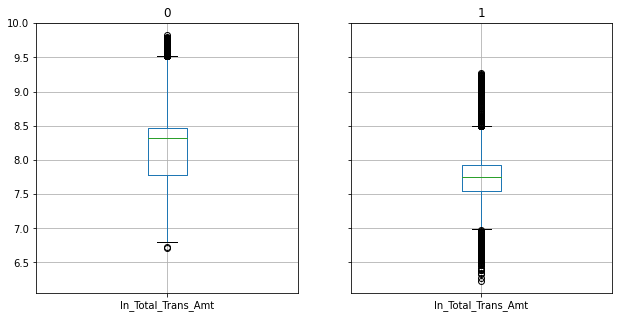

In [17]:
data['ln_Total_Trans_Amt'] = data['Total_Trans_Amt'].apply(np.log)
print(data.groupby(['Churned'])['ln_Total_Trans_Amt'].mean())
data.groupby(['Churned']).boxplot(column=['ln_Total_Trans_Amt'], figsize=(10,5))
plt.show()

Churned
0    0.296412
1    0.162475
Name: Avg_Utilization_Ratio, dtype: float64


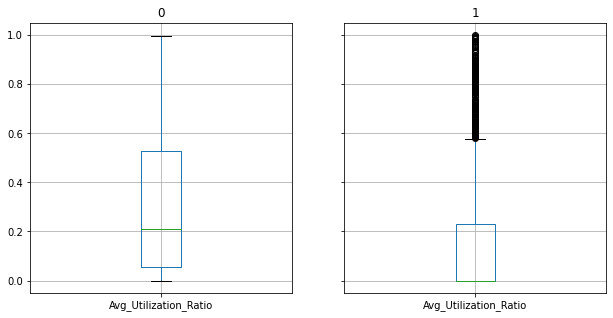

In [18]:
print(data.groupby(['Churned'])['Avg_Utilization_Ratio'].mean())
data.groupby(['Churned']).boxplot(column=['Avg_Utilization_Ratio'], figsize=(10,5))
plt.show()

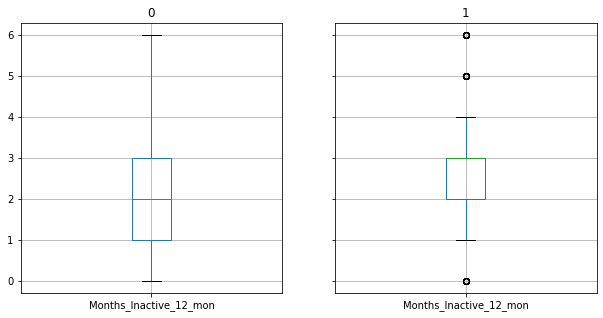

In [20]:
data.groupby(['Churned']).boxplot(column=['Months_Inactive_12_mon'], figsize=(10,5))
plt.show()

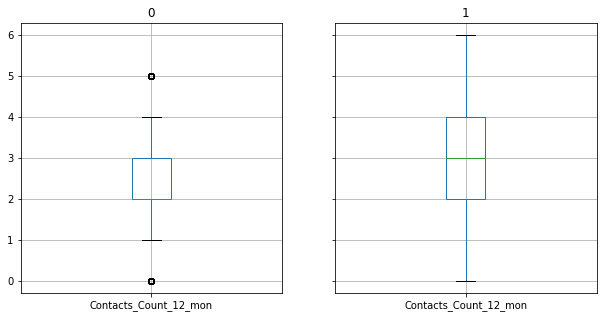

In [21]:
data.groupby(['Churned']).boxplot(column=['Contacts_Count_12_mon'], figsize=(10,5))
plt.show()
# Weird though, Churned customers have more contacts in the last 12 months

Churned
0    8.154636
1    8.216272
Name: ln_Avg_Open_To_Buy, dtype: float64


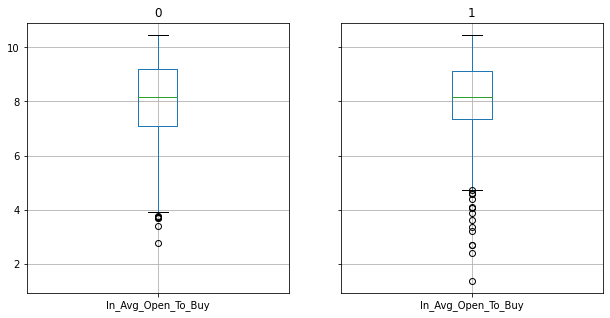

In [23]:
data['ln_Avg_Open_To_Buy'] = data['Avg_Open_To_Buy'].apply(lambda x: np.log(x+1))
print(data.groupby(['Churned'])['ln_Avg_Open_To_Buy'].mean())
data.groupby(['Churned']).boxplot(column=['ln_Avg_Open_To_Buy'], figsize=(10,5))
plt.show()

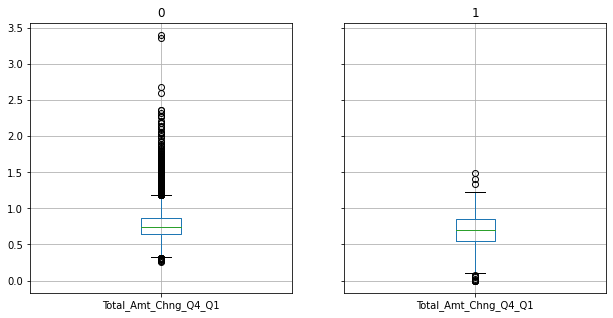

In [24]:
data.groupby(['Churned']).boxplot(column=['Total_Amt_Chng_Q4_Q1'], figsize=(10,5))
plt.show()

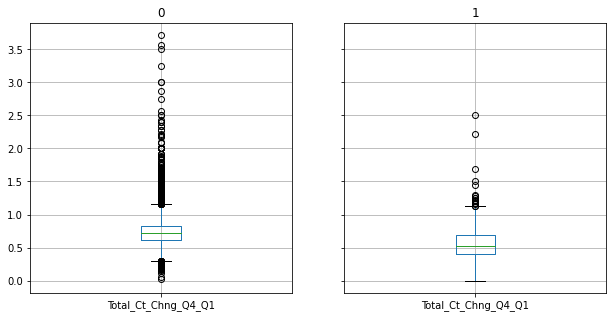

In [25]:
data.groupby(['Churned']).boxplot(column=['Total_Ct_Chng_Q4_Q1'], figsize=(10,5))
plt.show()

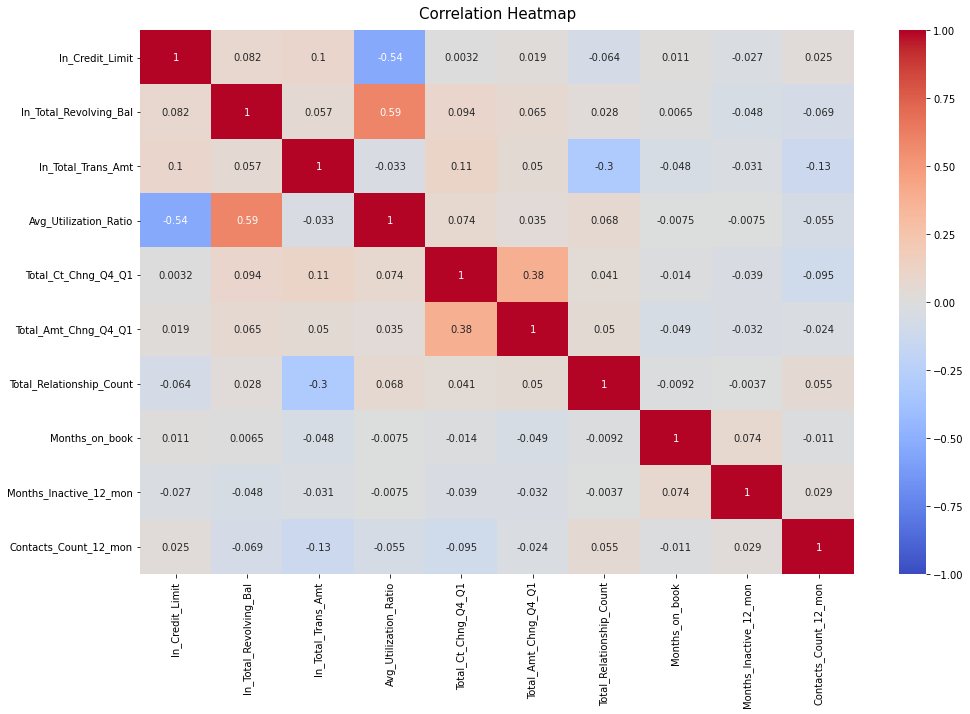

In [26]:
corr_df = data[['ln_Credit_Limit','ln_Total_Revolving_Bal',
                'ln_Total_Trans_Amt','Avg_Utilization_Ratio',
                'Total_Ct_Chng_Q4_Q1','Total_Amt_Chng_Q4_Q1',
                'Total_Relationship_Count', 'Months_on_book',
                'Months_Inactive_12_mon', 'Contacts_Count_12_mon']].corr()
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(corr_df, vmin=-1, vmax=1, annot=True,cmap="coolwarm")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=12)
plt.show()
# No strongly correlated numeric features

# **Feature Engineering**

In [27]:
data['Male'] = data['Gender'].apply(lambda x: int(x=='M'))
data['PostGraduate'] = data['Education_Level'].apply(lambda x: x=='Post-Graduate')
data['Doctorate'] = data['Education_Level'].apply(lambda x: int(x=='Doctorate'))

In [28]:
data = pd.get_dummies(data,
                      columns=['Marital_Status','Income_Category','Card_Category'],
                      drop_first=True)

In [68]:
features = [
    'PostGraduate',
    'Doctorate',
    'Dependent_count',
    'Marital_Status_Married',
    'Marital_Status_Single',
    'Marital_Status_Unknown',
    'Income_Category_$40K - $60K',
    'Income_Category_$60K - $80K',
    'Income_Category_$80K - $120K',
    'Income_Category_Less than $40K',
    'Income_Category_Unknown',
    'Card_Category_Gold',
    'Card_Category_Platinum',
    'Card_Category_Silver',
    'Total_Relationship_Count',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'ln_Total_Trans_Amt',
    'ln_Credit_Limit',
    'ln_Total_Revolving_Bal',
    'Avg_Utilization_Ratio',
    'Total_Amt_Chng_Q4_Q1',
    'Total_Ct_Chng_Q4_Q1'
]
X=data[features]
y=data['Churned']

# **Modeling**

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, roc_auc_score

In [48]:
clf_logi = LogisticRegressionCV(cv=5, random_state=0, max_iter=500)
clf_logi.fit(X_train, y_train)
y_pred = clf_logi.predict_proba(X_test)[:,1]

In [49]:
print(roc_auc_score(y_test,y_pred))
print(classification_report(y_test, y_pred>0.5))

0.8507216873390175
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1699
           1       0.75      0.43      0.54       327

    accuracy                           0.88      2026
   macro avg       0.82      0.70      0.74      2026
weighted avg       0.87      0.88      0.87      2026



## Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict_proba(X_test)[:,1]

In [52]:
print(roc_auc_score(y_test,y_pred))
print(classification_report(y_test, y_pred>0.5))

0.9727740548946763
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1699
           1       0.89      0.66      0.76       327

    accuracy                           0.93      2026
   macro avg       0.92      0.82      0.86      2026
weighted avg       0.93      0.93      0.93      2026



## XGBoost

In [53]:
from xgboost import XGBClassifier

In [54]:
clf_xgb = XGBClassifier(random_state=0)
clf_xgb.fit(X_train, y_train)
y_pred = clf_xgb.predict_proba(X_test)[:,1]

In [55]:
print(roc_auc_score(y_test,y_pred))
print(classification_report(y_test, y_pred>0.5))

0.977424208879841
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1699
           1       0.90      0.74      0.81       327

    accuracy                           0.95      2026
   macro avg       0.93      0.86      0.89      2026
weighted avg       0.94      0.95      0.94      2026



XGBoost and Random Forest seems to the better options comparing to Logistic Regression

## Model selection

In [42]:
from sklearn.model_selection import cross_val_score

In [56]:
scores_rf = cross_val_score(clf_rf, X_train, y_train, cv=5,scoring='roc_auc')
print(scores_rf.mean())
print(scores_rf.std())

0.9710427917238789
0.004229005106928051


In [57]:
scores_xgb = cross_val_score(clf_xgb, X_train, y_train, cv=5,scoring='roc_auc')
print(scores_xgb.mean())
print(scores_xgb.std())

0.9799162925018534
0.003942920373096226


We will move on with XGBoost because it is more accurate (higher mean) and robust (lower standard deviation).

# Feature Selection using permutation importance

In [58]:
from sklearn.inspection import permutation_importance

In [59]:
imps = permutation_importance(clf_xgb, X_test, y_test,
                              scoring="roc_auc",
                              random_state = 42)
pd.DataFrame([X_test.columns.to_list(),
              imps.importances_mean],
              index = ["Feature","Score"])\
              .transpose()\
              .sort_values(by = 'Score',ascending = False)\
              .reset_index(drop = True)

,Feature,Score
0,ln_Total_Trans_Amt,0.193973
1,ln_Total_Revolving_Bal,0.033602
2,Total_Relationship_Count,0.019339
3,Total_Amt_Chng_Q4_Q1,0.01618
4,Total_Ct_Chng_Q4_Q1,0.014704
5,Months_Inactive_12_mon,0.005264
6,Contacts_Count_12_mon,0.002718
7,ln_Credit_Limit,0.000832
8,Avg_Utilization_Ratio,0.000764
9,Dependent_count,0.000742


In [70]:
features_final = [
                  'Marital_Status_Married',
                  'Dependent_count',
                  'Income_Category_$60K - $80K',
                  'ln_Total_Revolving_Bal',
                  'ln_Credit_Limit',
                  'ln_Total_Trans_Amt',
                  'Total_Relationship_Count',
                  'Total_Amt_Chng_Q4_Q1',
                  'Total_Ct_Chng_Q4_Q1',
                  'Months_Inactive_12_mon',
                  'Contacts_Count_12_mon',
                  'Avg_Utilization_Ratio'
]
X_train = X_train[features_final]
X_test = X_test[features_final]

In [80]:
clf_xgb = XGBClassifier(random_state=0)
clf_xgb.fit(X_train, y_train)
y_pred = clf_xgb.predict_proba(X_test)[:,1]

In [81]:
print(roc_auc_score(y_test,y_pred))
print(classification_report(y_test, y_pred>0.5))

0.977424208879841
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1699
           1       0.90      0.74      0.81       327

    accuracy                           0.95      2026
   macro avg       0.93      0.86      0.89      2026
weighted avg       0.94      0.95      0.94      2026



To solve imbalanced dataset issue, we can adjust the model by putting more weight to the positive cases to improve recall for positive cases

In [85]:
weight = round(y_train.shape[0]/y_train.sum()-1,2)
weight

5.23

In [86]:
clf_xgb = XGBClassifier(random_state=0,scale_pos_weight=weight)
clf_xgb.fit(X_train, y_train)
y_pred = clf_xgb.predict_proba(X_test)[:,1]

In [87]:
print(roc_auc_score(y_test,y_pred))
print(classification_report(y_test, y_pred>0.5))

0.97765640158899
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1699
           1       0.72      0.93      0.81       327

    accuracy                           0.93      2026
   macro avg       0.85      0.93      0.88      2026
weighted avg       0.94      0.93      0.93      2026



# Recommendations based on SHAP analysis

In [ ]:
!pip install shap
import shap

In [ ]:
xgb_explainer = shap.TreeExplainer(clf_xgb,X_train)
shap_values = xgb_explainer.shap_values(X_train)

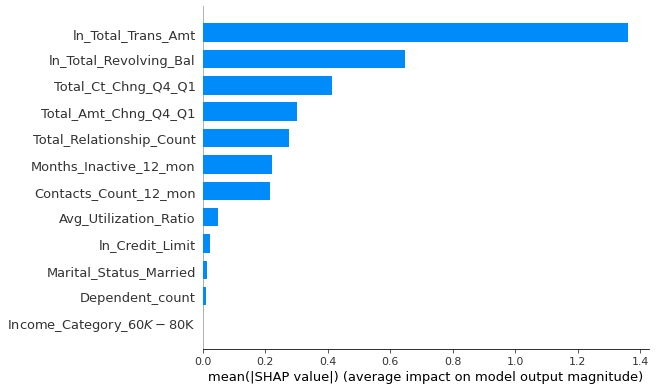

In [90]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, plot_type='bar')

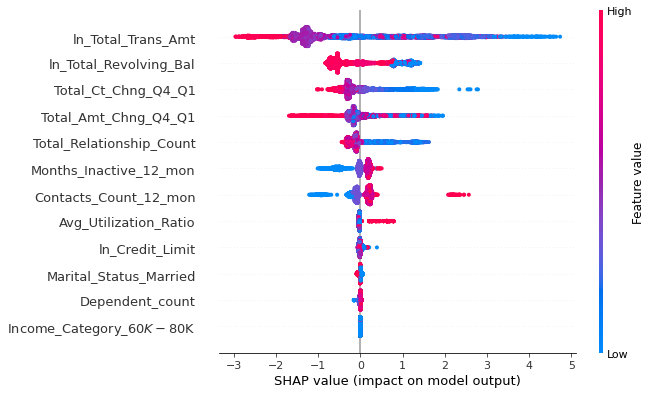

In [91]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

Based on the SHAP values of the features, 3 recommendations are provided as follows:

1. **Total transaction amount** in the last 12 months is the most important feature we need pay attention to the customers, customers with low transaction amount should be incentivized to use credit card more through promotion messages or emails.

2. **Comparison in transaction amount and count with previous quarters** are also important, if the transaction shows a downward trend (less transaction in Q4 comparing to Q1), we should take actions to remind customers.

3. **Increasing the number of products** held by the customer can also increase the chance of retention.